**Start Project** 
# Boston Housing Data

**This dataset is with 14 attributes and 506 data to obtain the crime rate in the Boston area.**  
**The name of this feature in my dataset is CRIM, if the value of this feature is more than 0.3, it means that there is crime in this area.**  
**And if its rate is less than 0.3, then there is no crime or there is very little crime.**  

data set resource  :https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset



# **Read csv file**  
**We can read our csv file with the pandas library and save it in a variable.**  

***List of all data attributes***  

. CRIM -> Crime rate  

. ZN -> residential land zoned for lots over 25,000 sq.ft.  

. INDUS -> non-retail business acres per town  

. CHAS -> River dummy variable  

. NOX -> nitric oxides concentration (parts per 10 million)  

. RM -> average number of rooms per dwelling  

. AGE -> owner-occupied units built prior to 1940  

. DIS -> weighted distances to five Boston employment centres  

. RAD -> index of accessibility to radial highways  

. TAX -> full-value property-tax rate per $10,000  

. PTRATIO -> pupil-teacher ratio by town  

. B -> 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  

. LSTAT -> % lower status of the population  

. MEDV -> Median value of owner-occupied homes in $1000's  











In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [231]:
housing_data = pd.read_csv('./data.csv')
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


# **data set information**  
column name , no-null count of data , column data type

In [232]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


There is probably NAN in the RM attribute.  


In [233]:
print(housing_data.columns.to_list())

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


# isna  
**Detect Nan values**  
not as a number

In [234]:
housing_data.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM          True
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

Therefore, the following command can be used to delete NANs.

In [235]:
housing_data = housing_data[housing_data["RM"].notna()]

In [236]:
housing_data.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

There are no missing values in the attributes.

And We can also change the data type of attributes with the astype command from the pandas library.  
For example, we convert CHAS, RAD, TAX attributes from int data type to float data type.

In [237]:
housing_data = housing_data.astype({"CHAS":"float"})
housing_data = housing_data.astype({"RAD" : "float"})
housing_data = housing_data.astype({"TAX" : "float"})

In [238]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


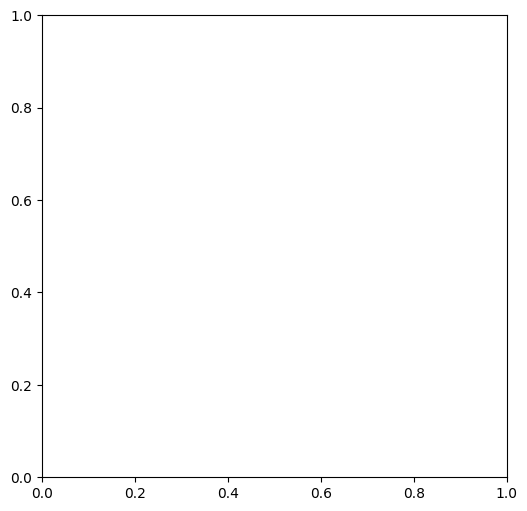

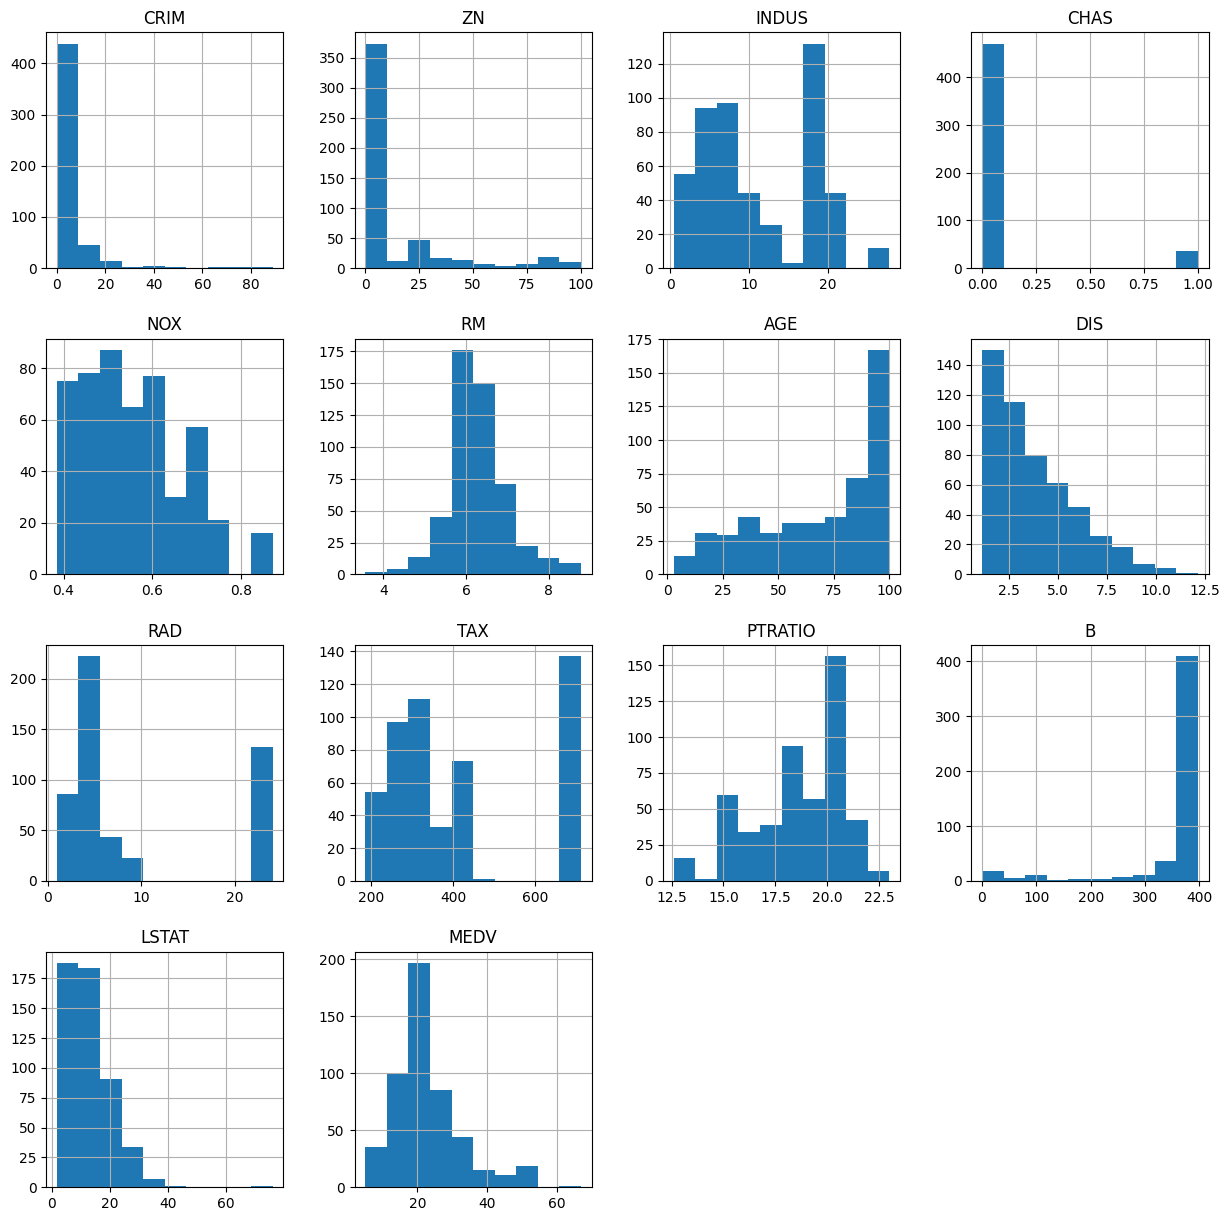

In [239]:
housing_data.iloc[:,:].hist(figsize=(15,15))
plt.show()

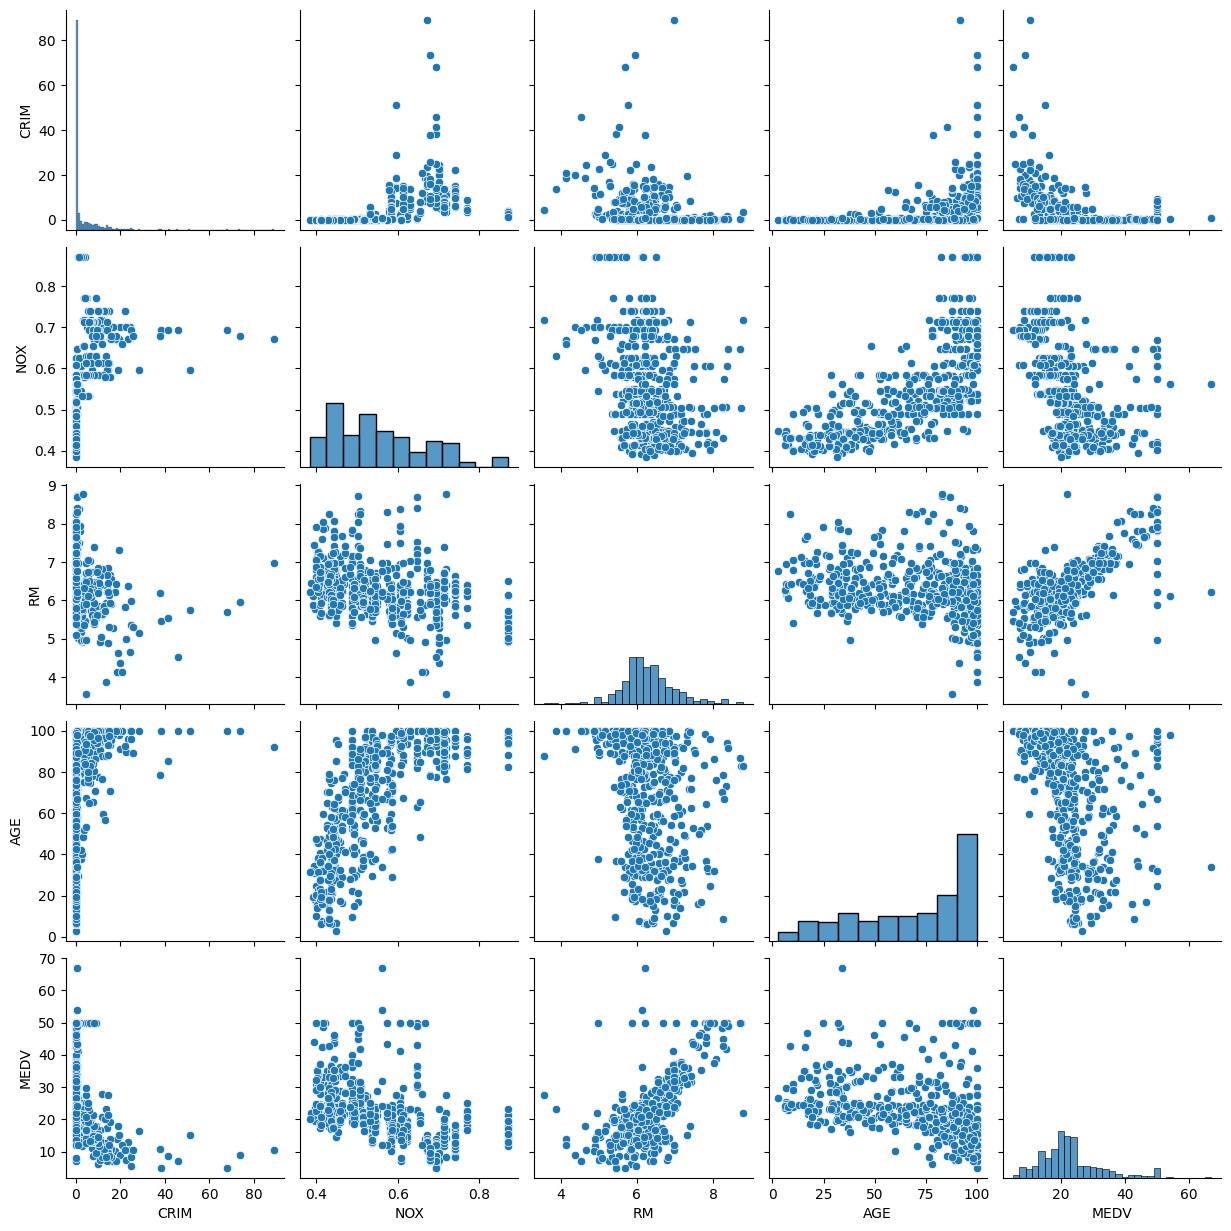

In [240]:
import seaborn as sns
datap=housing_data[['CRIM', 'NOX','RM','AGE','MEDV']]
sns.pairplot(datap.iloc[:,:5])
plt.show()

All attributes are numeric variables

# describe
The describe() method returns description of the data in the DataSet.  

If the DataSet contains numerical data, the description contains these information for each column:  

count - The number of not-empty values.  
mean - The average (mean) value.  
std - The standard deviation.  
min - the minimum value.  
25% - The 25% percentile.  
50% - The 50% percentile.  
75% - The 75% percentile.  
max - the maximum value.  

In [241]:
housing_data.describe()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.617404,11.289526,11.174842,0.069170,0.555209,6.287589,68.555731,3.775231,9.531621,408.330040,18.498419,356.228379,12.872569,22.711858
std,8.600123,23.325350,6.824592,0.253994,0.115611,0.703802,28.161573,2.096147,8.716661,168.382685,2.202078,91.253462,7.823528,9.520520
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082268,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.098500,4.000000,280.250000,17.400000,374.687500,6.950000,17.025000
50%,0.266005,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.122200,5.000000,330.000000,19.100000,391.260000,11.465000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629750,93.975000,5.117675,24.000000,666.000000,20.200000,396.210000,17.107500,25.075000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


# Categorise target
This opperation is for stting the target column which we define crime for this part so if the crime is bigger than 0.3 we set it to one and if its lower than 0.3 we set it to zero to classify our data.

In [242]:
housing_data.loc[housing_data["CRIM"] <= 0.3 , "CRIM"] = 0
housing_data.loc[housing_data["CRIM"] > 0.3 , "CRIM"] = 1
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.0,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.0,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.0,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.0,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1.0,0.0,12.50,0.0,0.561,6.980,89.0,2.0980,3.0,320.0,23.0,396.00,12.00,12.0
507,0.0,0.0,12.50,0.0,0.561,6.980,76.0,2.6540,3.0,320.0,23.0,343.00,25.00,32.0
508,1.0,0.0,12.50,0.0,0.561,6.123,98.0,2.9870,3.0,320.0,23.0,343.00,21.00,54.0
509,1.0,0.0,12.70,0.0,0.561,6.222,34.0,2.5430,3.0,329.0,23.0,343.00,76.00,67.0


In [243]:
housing_data["CRIM"].unique()

array([0., 1.])

In [244]:
housing_data["CRIM"].value_counts()

0.0    262
1.0    244
Name: CRIM, dtype: int64

# Box Plot  
A boxplot is created by calculating the quartiles of a data set, which divide the number range into four pieces based on their distribution.  

Median: the value in the middle of the distribution  
Lower quartile: the midpoint between the median and lowest value in the range  
Upper quartile: the midpoint between the median and highest value in the range  
Lower boundary: the lowest value in the distribution  
Higher boundary: the highest value in the distribution  

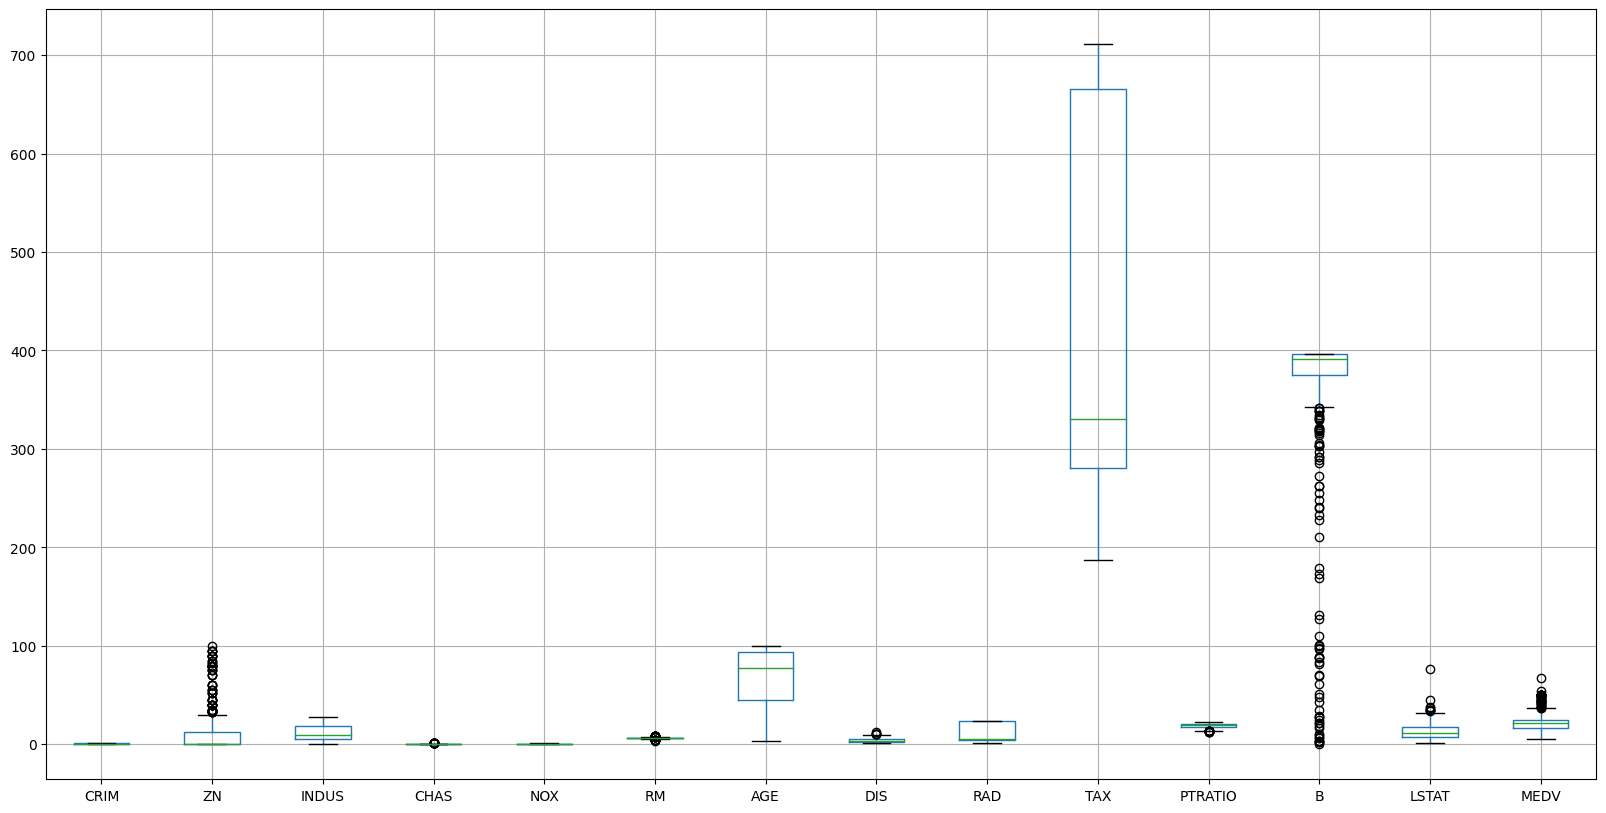

In [245]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20,10]
housing_data_plot= housing_data.boxplot(column=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])
housing_data_plot.plot()
plt.show()

# sklearn  

classifing with sklearn  


seprate our test and train data with train_test_split data  


In [246]:
from sklearn.model_selection import train_test_split

random_state = 40
train_features, test_features, train_target, test_target = train_test_split(housing_data.iloc[:,1:] , housing_data["CRIM"], test_size=0.2, random_state=random_state)

# Decision Tree  

The first model is the decision tree model.  

**Gini**  

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classification = DecisionTreeClassifier(
    criterion="gini" ,
    splitter="best" ,
    random_state=random_state

)

classification.fit(train_features , train_target)
print(classification.score(test_features, test_target))
desision_tree_predictions = classification.predict(test_features)

0.9607843137254902


In [ ]:
from sklearn import tree

tree.plot_tree(classification)


[Text(0.4224137931034483, 0.95, 'X[3] <= 0.528\ngini = 0.496\nsamples = 404\nvalue = [220, 184]'),
 Text(0.22413793103448276, 0.85, 'X[7] <= 7.5\ngini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(0.13793103448275862, 0.75, 'X[4] <= 5.488\ngini = 0.053\nsamples = 184\nvalue = [179, 5]'),
 Text(0.06896551724137931, 0.65, 'X[7] <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.034482758620689655, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10344827586206896, 0.55, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.20689655172413793, 0.65, 'X[4] <= 8.164\ngini = 0.033\nsamples = 181\nvalue = [178, 3]'),
 Text(0.1724137931034483, 0.55, 'X[9] <= 19.05\ngini = 0.022\nsamples = 180\nvalue = [178, 2]'),
 Text(0.13793103448275862, 0.45, 'gini = 0.0\nsamples = 134\nvalue = [134, 0]'),
 Text(0.20689655172413793, 0.45, 'X[4] <= 6.117\ngini = 0.083\nsamples = 46\nvalue = [44, 2]'),
 Text(0.1724137931034483, 0.35, 'X[4] <= 6.095\ngini = 0.172\nsamples = 21\nvalue = [19

In [ ]:
feature_names = list(train_features.columns)
print(tree.export_text(classification, max_depth = 10, feature_names = feature_names))

|--- NOX <= 0.53
|   |--- RAD <= 7.50
|   |   |--- RM <= 5.49
|   |   |   |--- RAD <= 3.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- RAD >  3.50
|   |   |   |   |--- class: 1.0
|   |   |--- RM >  5.49
|   |   |   |--- RM <= 8.16
|   |   |   |   |--- PTRATIO <= 19.05
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- PTRATIO >  19.05
|   |   |   |   |   |--- RM <= 6.12
|   |   |   |   |   |   |--- RM <= 6.10
|   |   |   |   |   |   |   |--- LSTAT <= 7.86
|   |   |   |   |   |   |   |   |--- DIS <= 5.00
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- DIS >  5.00
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- LSTAT >  7.86
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- RM >  6.10
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- RM >  6.12
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- RM >  8.16
|   |   |   |   |--- class: 1.0
|   |--- RAD

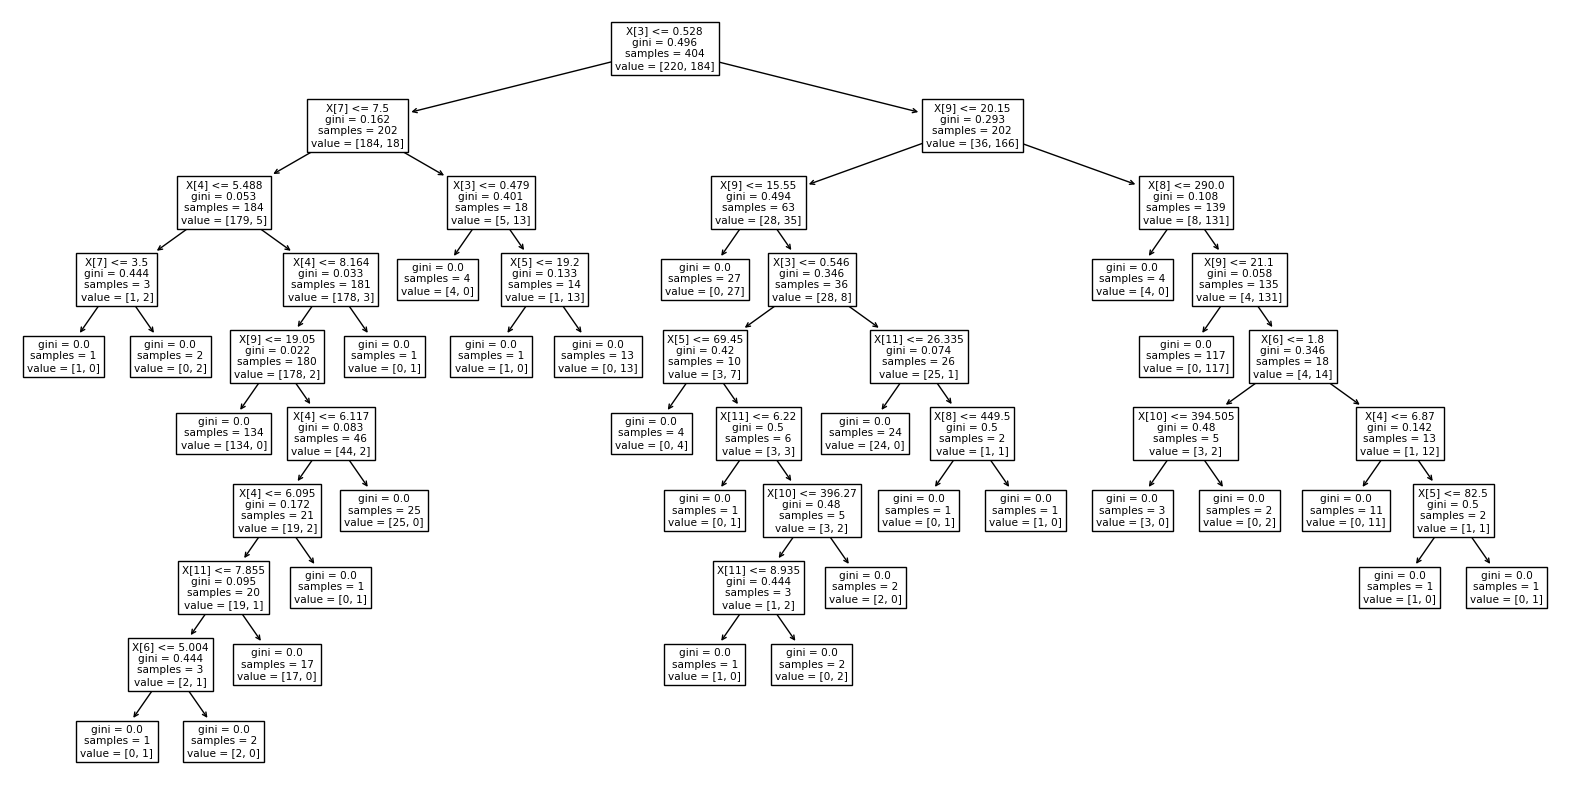

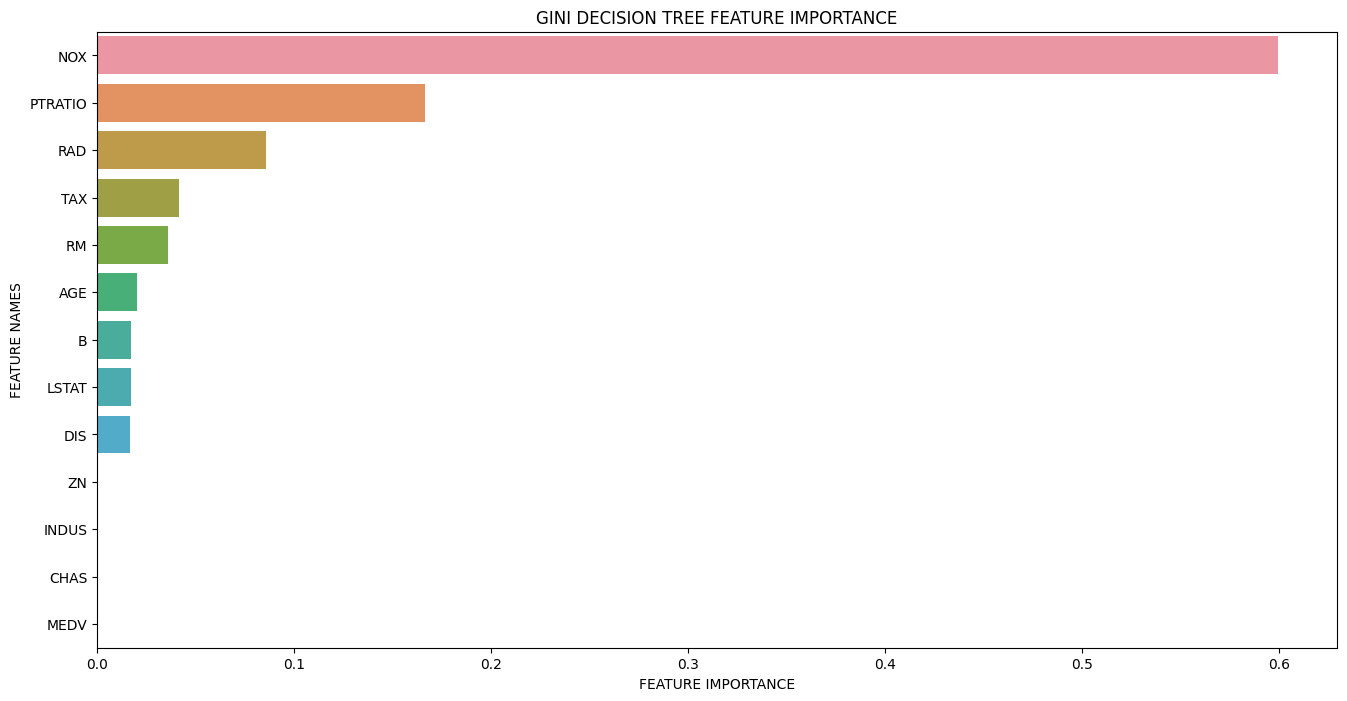

In [ ]:
import seaborn as sns

feature_importance = np.array(classification.feature_importances_)
feature_names = np.array(train_features.columns)

data = {
    'feature_names': feature_names,
    'feature_importance': feature_importance
}
fi_df = pd.DataFrame(data)
fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

plt.figure(figsize = (16, 8))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
plt.title('GINI DECISION TREE FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

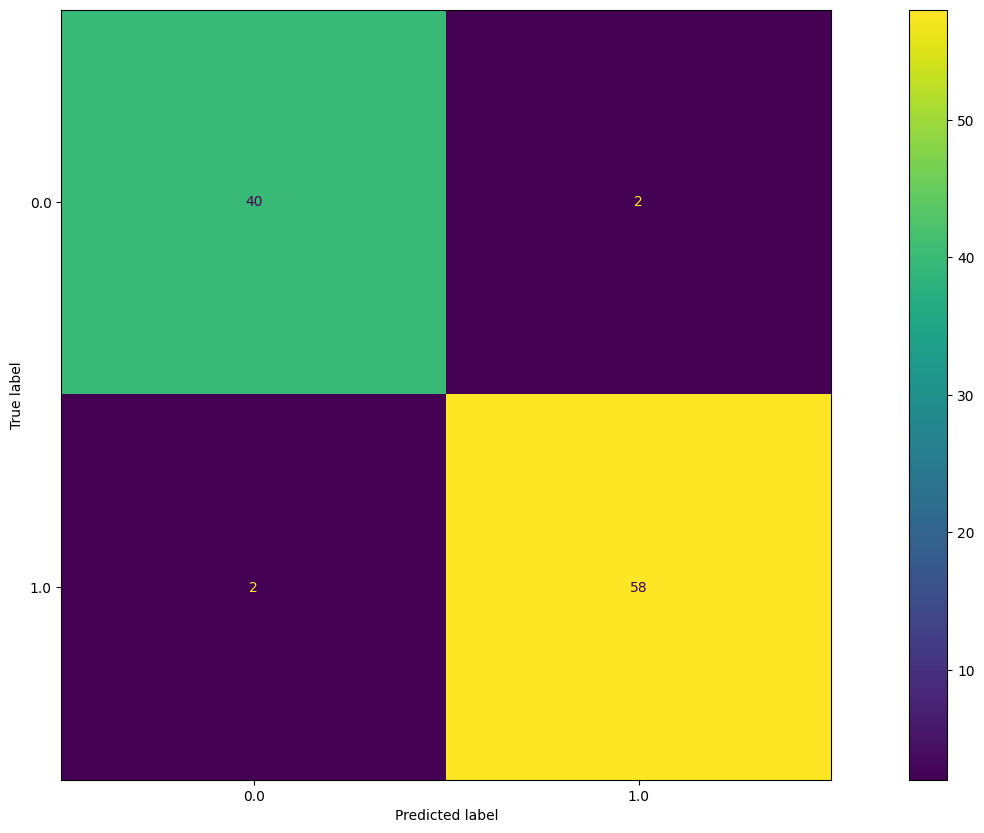

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(
    test_target ,
    desision_tree_predictions
)

cm

disp = ConfusionMatrixDisplay(
    confusion_matrix = cm ,
    display_labels = classification.classes_
)

disp.plot()
plt.show()

f1_score  
Precision  
Recall  
F-score

In [ ]:
from sklearn.metrics import f1_score


f1score=f1_score(test_target, desision_tree_predictions, average='macro')
print("f1_score= ",f1score)

f1_score=  0.9595238095238094


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
lst=precision_recall_fscore_support(test_target, desision_tree_predictions, average='macro')
print ("pricision= ",lst[0])
print("recall= ",lst[1])
print("fscore= ",lst[2])

pricision=  0.9595238095238094
recall=  0.9595238095238094
fscore=  0.9595238095238094


**Entropy**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classification = DecisionTreeClassifier(
    criterion="entropy" ,
    splitter="best" ,
    random_state=random_state

)

classification.fit(train_features , train_target)
print(classification.score(test_features, test_target))
desision_tree_predictions1 = classification.predict(test_features)

0.9509803921568627


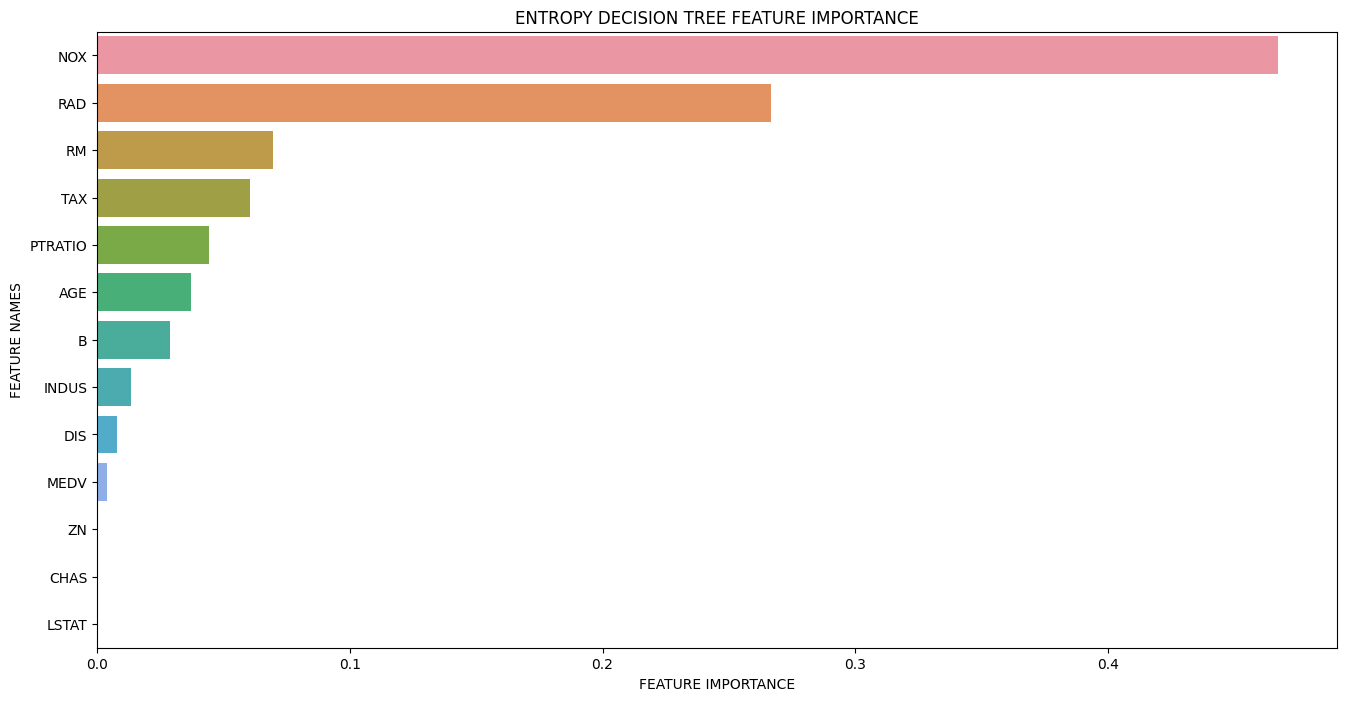

In [ ]:
feature_importance = np.array(classification.feature_importances_)
feature_names = np.array(train_features.columns)

data = {
    'feature_names': feature_names,
    'feature_importance': feature_importance
}
fi_df = pd.DataFrame(data)
fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

plt.figure(figsize = (16, 8))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
plt.title('ENTROPY DECISION TREE FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

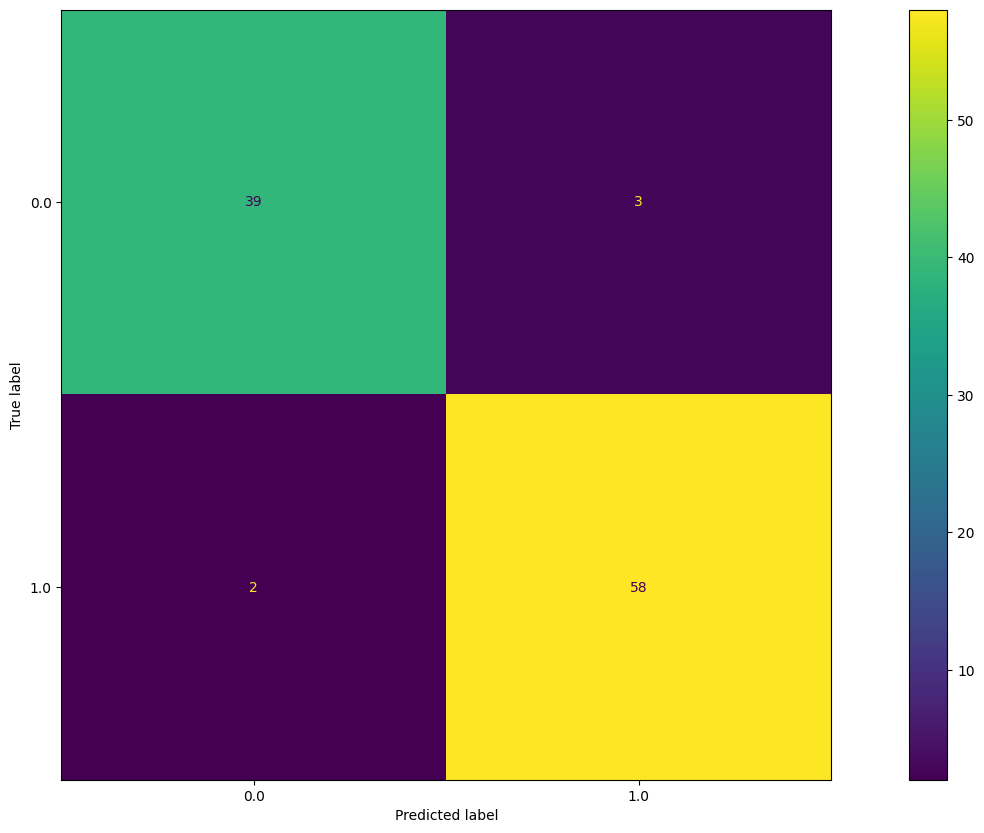

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(
    test_target ,
    desision_tree_predictions1
)

cm

disp = ConfusionMatrixDisplay(
    confusion_matrix = cm ,
    display_labels = classification.classes_
)

disp.plot()
plt.show()

f1_score  
Precision  
Recall  
F-score

In [ ]:
from sklearn.metrics import f1_score


f1score = f1_score(test_target, desision_tree_predictions1, average='macro')
print("f1_score= ", f1score)


f1_score=  0.9492183610474958


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
lst = precision_recall_fscore_support(test_target, desision_tree_predictions1, average='macro')
print ("pricision= ",lst[0])
print("recall= ",lst[1])
print("fscore= ",lst[2])

pricision=  0.9510195921631347
recall=  0.9476190476190476
fscore=  0.9492183610474958


**In this data set, Gini is better than entropy.**

# Random Forest  

The second model is the Random Forest model.   

**Gini**


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_random_forest = RandomForestClassifier(
    n_estimators=500 ,
    criterion="gini" 

)

clf_random_forest.fit(train_features , train_target)
print(clf_random_forest.score(test_features, test_target))
random_forest_predictions1 = clf_random_forest.predict(test_features)

0.9705882352941176


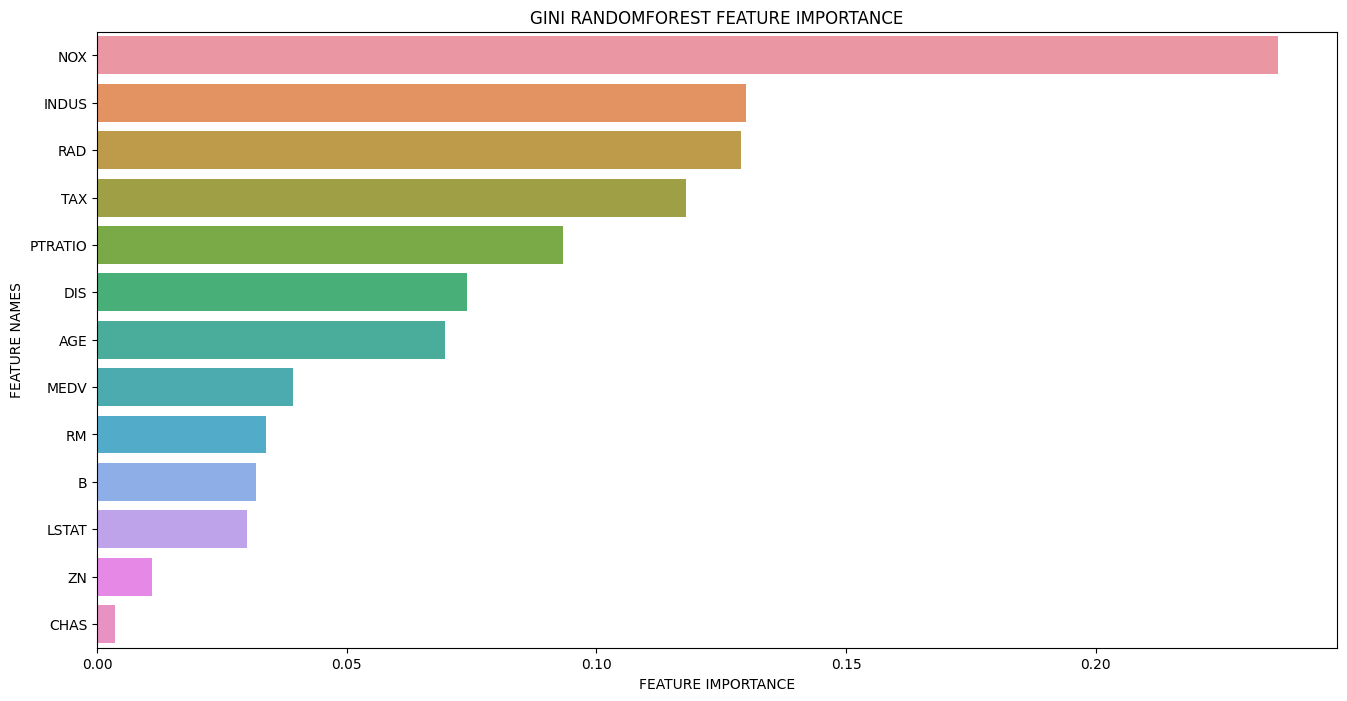

In [ ]:
feature_importance = np.array(clf_random_forest.feature_importances_)
feature_names = np.array(train_features.columns)

data = {
    'feature_names': feature_names,
    'feature_importance': feature_importance
}
fi_df = pd.DataFrame(data)
fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

plt.figure(figsize = (16, 8))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
plt.title('GINI RANDOMFOREST FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

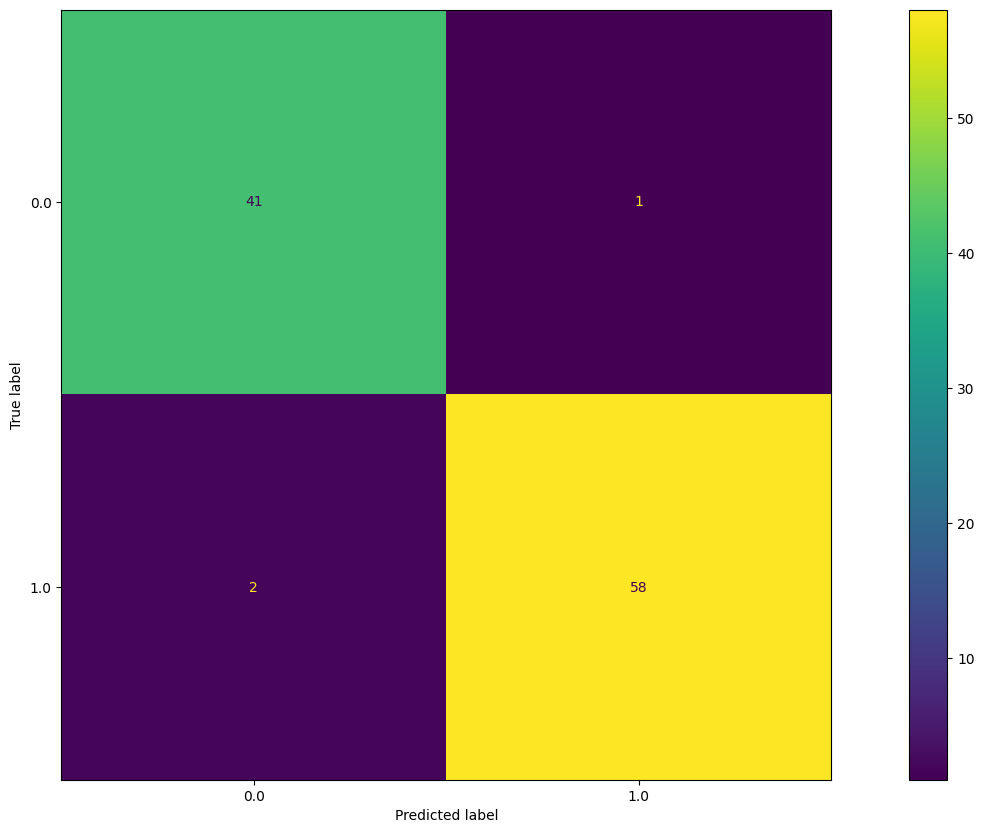

In [ ]:
cm = confusion_matrix(
    test_target ,
    random_forest_predictions1
)


disp = ConfusionMatrixDisplay(
    confusion_matrix = cm ,
    display_labels = clf_random_forest.classes_
)

disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import f1_score


f1score = f1_score(test_target,random_forest_predictions1, average='macro')
print("f1_score= ", f1score)

f1_score=  0.9697478991596639


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
lst = precision_recall_fscore_support(test_target, random_forest_predictions1, average='macro')
print ("pricision= ",lst[0])
print("recall= ",lst[1])
print("fscore= ",lst[2])

pricision=  0.9682696097753252
recall=  0.9714285714285714
fscore=  0.9697478991596639


**Entropy**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_random_forest = RandomForestClassifier(
    n_estimators=500 ,
    criterion="entropy" 

)

clf_random_forest.fit(train_features , train_target)
print(clf_random_forest.score(test_features, test_target))
random_forest_predictions2 = clf_random_forest.predict(test_features)

0.9705882352941176


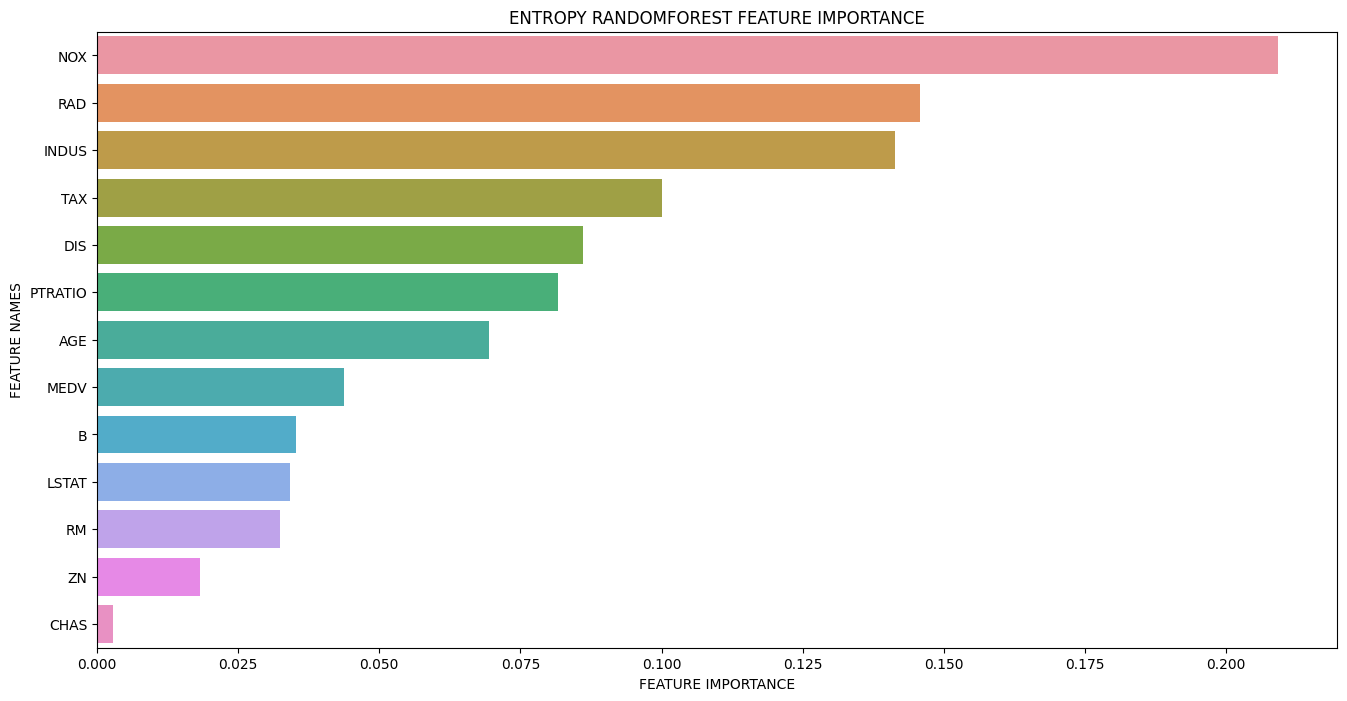

In [ ]:
feature_importance = np.array(clf_random_forest.feature_importances_)
feature_names = np.array(train_features.columns)

data = {
    'feature_names': feature_names,
    'feature_importance': feature_importance
}
fi_df = pd.DataFrame(data)
fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

plt.figure(figsize = (16, 8))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
plt.title('ENTROPY RANDOMFOREST FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

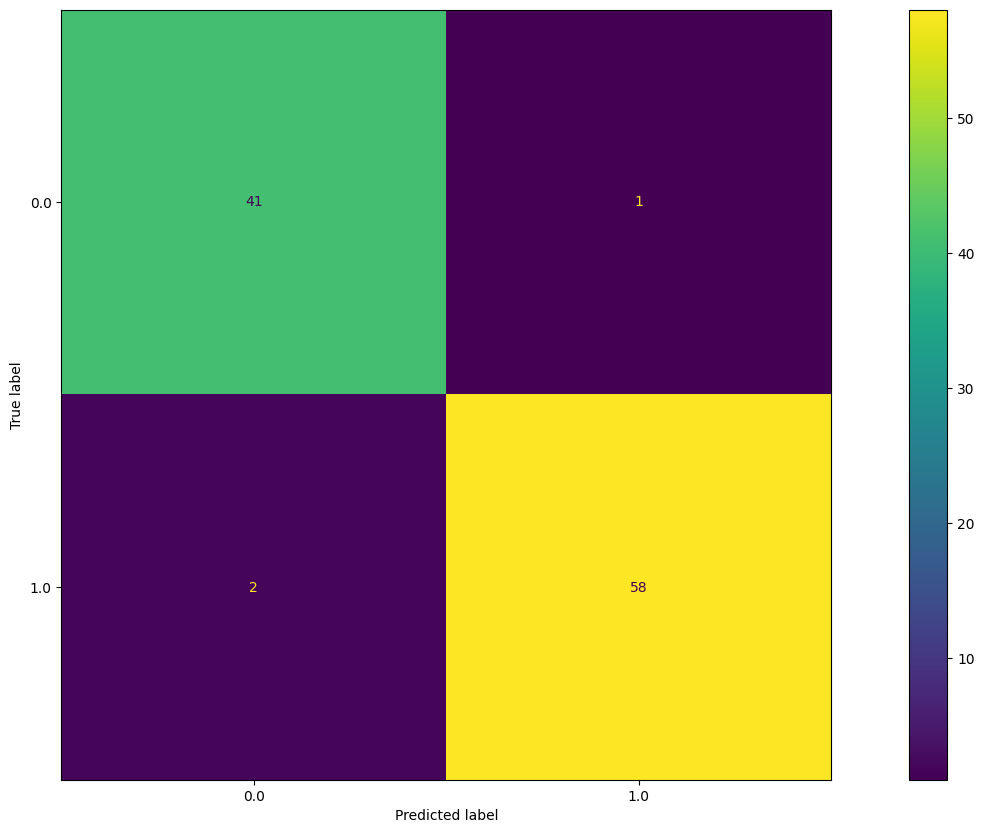

In [ ]:
cm = confusion_matrix(
    test_target ,
    random_forest_predictions2
)


disp = ConfusionMatrixDisplay(
    confusion_matrix = cm ,
    display_labels = clf_random_forest.classes_
)

disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import f1_score


f1score = f1_score(test_target,random_forest_predictions2, average='macro')
print("f1_score= ", f1score)

f1_score=  0.9697478991596639


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
lst = precision_recall_fscore_support(test_target, random_forest_predictions2, average='macro')
print ("pricision= ",lst[0])
print("recall= ",lst[1])
print("fscore= ",lst[2])

pricision=  0.9682696097753252
recall=  0.9714285714285714
fscore=  0.9697478991596639


**Both Gini and Entropy are equally accurate**

# GaussianNB  
the Third model is the GaussianNB(Nave Bayse) model.   


In [ ]:
from sklearn.naive_bayes import GaussianNB

classification_gaussian = GaussianNB(

)

classification_gaussian.fit(train_features , train_target)
print(classification_gaussian.score(test_features, test_target))
predictions = classification_gaussian.predict(test_features)

0.7843137254901961


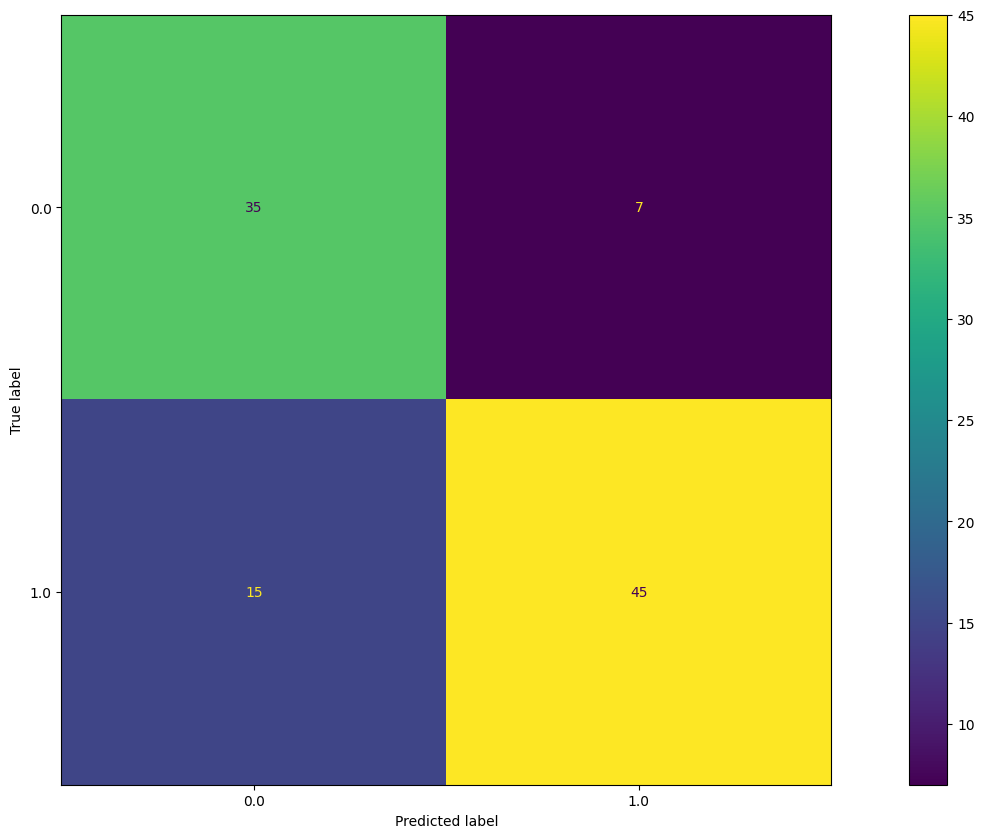

In [ ]:
cm = confusion_matrix(
    test_target ,
    predictions
)


disp = ConfusionMatrixDisplay(
    confusion_matrix = cm ,
    display_labels = classification_gaussian.classes_
)

disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import f1_score


f1score = f1_score(test_target,predictions, average='macro')
print("f1_score= ", f1score)

f1_score=  0.78222049689441


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
lst = precision_recall_fscore_support(test_target, predictions, average='macro')
print ("pricision= ",lst[0])
print("recall= ",lst[1])
print("fscore= ",lst[2])

pricision=  0.7826923076923077
recall=  0.7916666666666667
fscore=  0.78222049689441


# Result 

1.Random Forest (gini,entropy)  
2.Decision Tree (gini)  
3.Decision Tree (entropy)  
4.GaussianNB